In [1]:
import pandas as pd
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact

from shutil import rmtree
from os import listdir, mkdir
from os.path import isfile, join, isdir

## Load the Data

In [2]:
df_training = pd.read_csv('./bap-imgap-212022/train.csv')
print(df_training.head(), '\n')


df_test = pd.read_csv('./bap-imgap-212022/test.csv')
print(df_test.head())


def get_data_from_mat(train_file, test_file):
    train_mat = scipy.io.loadmat(train_file) 
    test_mat = scipy.io.loadmat(test_file) 

    train_np = np.array(train_mat['train_data']).transpose(2, 0, 1)
    test_np = np.array(test_mat['test_data']).transpose(2, 0, 1)

    print(train_np.shape)
    print(test_np.shape)

    return train_np, test_np

train_data, test_data = get_data_from_mat('./bap-imgap-212022/train_data.mat','./bap-imgap-212022/test_data.mat')

   id  age  sex  education
0   1   13    1          7
1   2   14    0          8
2   3   15    1          9
3   4   15    1          9
4   5   15    1          9 

   id  sex  education
0   1    0         13
1   2    0         11
2   3    1          9
3   4    1         13
4   5    0         12
(112, 90, 90)
(28, 90, 90)


## Dataset Exploration

### 1. Missing Values

In [3]:
# Missing values (%)
print(df_training.isna().sum() * 100 / len(df_training))

id           0.0
age          0.0
sex          0.0
education    0.0
dtype: float64


### 2. Unique Values

In [4]:
cols = ['age', 'sex', 'education']

for col in cols:
    print('\n' + 'coluna: ' + col + '\nvalores: ' + str(df_training[col].unique()))


coluna: age
valores: [13 14 15 16 17 24 37 21 18 26 40 25 54 33 46 19 31 28 27 41 20 42 22 61
 53 65 77 64 56 55 62 68 57 58 70 69 71 72 59 73 51 76 63 66 79 52 74 67]

coluna: sex
valores: [1 0]

coluna: education
valores: [ 7  8  9 10 11 12 17 13 16  6 15 14 20 19  4  2  0  3]


###  3. Distributions

<AxesSubplot:xlabel='age', ylabel='Count'>

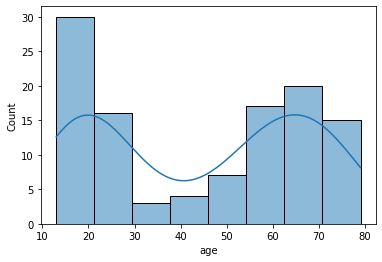

In [5]:
sns.histplot(df_training['age'], kde = True)

<AxesSubplot:xlabel='sex', ylabel='Count'>

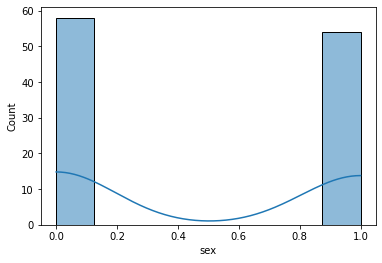

In [6]:
sns.histplot(df_training['sex'], kde = True)

<AxesSubplot:xlabel='education', ylabel='Count'>

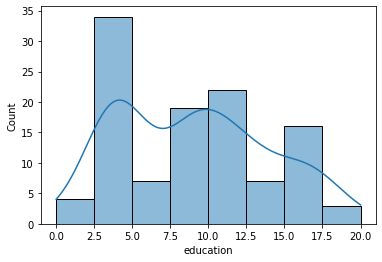

In [7]:
sns.histplot(df_training['education'], kde = True)

### 4. Outliers

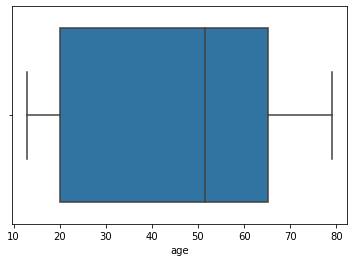

In [8]:
ax = sns.boxplot(x = df_training['age'])

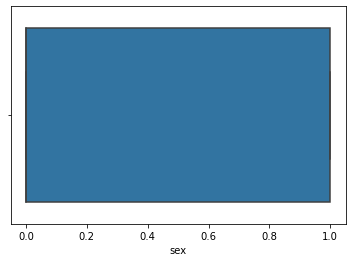

In [9]:
ax = sns.boxplot(x = df_training['sex'])

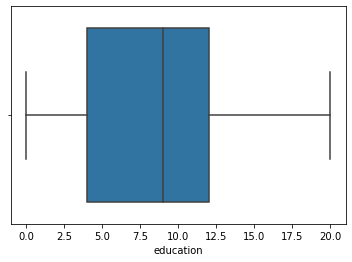

In [10]:
ax = sns.boxplot(x = df_training['education'])

### 5. Diffusion MRI

In [11]:
def visualize(image):  
    plt.imshow(image)    
    plt.show()      


def show_ds(ds):
    print("ds shape:",ds.shape)
    print("ds max:", np.max(ds))
    print("ds min:", np.min(ds))
    print("ds average:",np.average(ds))
    
    @interact
    def visualize_set(scan_index=(0,len(ds)-1)):
        visualize(ds[scan_index,:,:])


show_ds(train_data)

ds shape: (112, 90, 90)
ds max: 1.0
ds min: 0.0
ds average: 0.024116160549305543


interactive(children=(IntSlider(value=55, description='scan_index', max=111), Output()), _dom_classes=('widget…